In [1]:
import pandas as pd
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
)
print df.head()

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [2]:
#correcting the class column (response)
##mapping the features to numeric values
#dataframe > ndarray > list > dictionary
classlist = df["class"].unique()
l = list(classlist)

d = {x:l.index(x) for x in l}
print d

{'Iris-virginica': 2, 'Iris-setosa': 0, 'Iris-versicolor': 1}


In [4]:
##create a column in dataframe based on the dictionary
df["reclass"]=10
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class,reclass
0,5.1,3.5,1.4,0.2,Iris-setosa,10
1,4.9,3.0,1.4,0.2,Iris-setosa,10
2,4.7,3.2,1.3,0.2,Iris-setosa,10
3,4.6,3.1,1.5,0.2,Iris-setosa,10
4,5.0,3.6,1.4,0.2,Iris-setosa,10


In [12]:
d["Iris-virginica"]


dict

In [15]:
##note that map function is not done in place and must be used in assignment expression
df["reclass"] = df["class"].map(lambda x:d[x])

array([0, 1, 2], dtype=int64)

In [16]:
##time to play with data
X=df.iloc[:,:4]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
y=df["reclass"]

In [18]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=.3)
print Xtrain.shape
print Xtest.shape
print ytrain.shape
print ytest.shape

(105, 4)
(45, 4)
(105L,)
(45L,)


In [19]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(Xtrain, ytrain)
ypred= clf.predict(Xtest)

In [20]:
from sklearn.metrics import accuracy_score
print accuracy_score(ytest, ypred)

0.955555555556


In [23]:
LogisticRegression()


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [43]:
#testing various hyperparamters
scores=[]
for i in range(1,100):
    clf=LogisticRegression(C=i)
    clf.fit(Xtrain, ytrain)
    ypred = clf.predict(Xtest)
    scores.append(accuracy_score(ytest, ypred))

(0.8, 1.1)

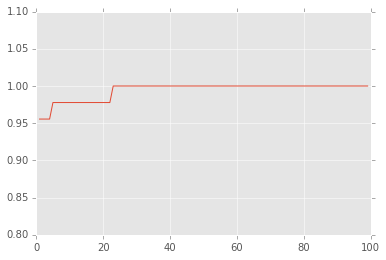

In [46]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.plot(range(1,100), scores)
plt.ylim(.8,1.1)

(0.95, 1.005)

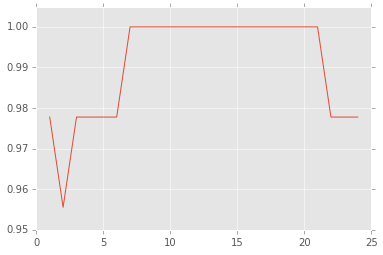

In [57]:
##the same graph for knn
from sklearn.neighbors import KNeighborsClassifier
scores=[]
for n in range(1,25):
    clf=KNeighborsClassifier(n_neighbors=n)
    clf.fit(Xtrain, ytrain)
    ypred = clf.predict(Xtest)
    scores.append(accuracy_score(ytest, ypred))

plt.plot(range(1,25), scores)
plt.ylim(.95,1.005)